In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
713,7.80,24.0,0
385,7.33,21.0,0
96,7.09,28.0,1
185,7.30,31.0,0
730,6.14,90.0,1


C:\Users\Hanif ullah laptop\AppData\Local\Temp\ipykernel_11132\827012764.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"] )


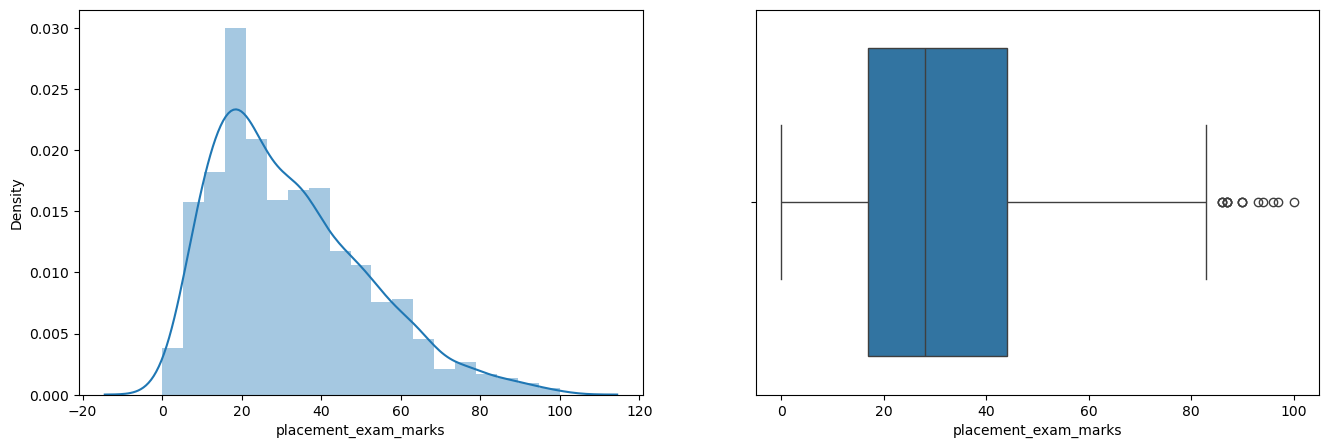

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["placement_exam_marks"] )
plt.subplot(1,2,2)
sns.boxplot(x = df["placement_exam_marks"])
plt.show()

In [11]:
print("Mean value of cgpa",df['placement_exam_marks'].mean())
print("Std value of cgpa",df['placement_exam_marks'].std())
print("Min value of cgpa",df['placement_exam_marks'].min())
print("Max value of cgpa",df['placement_exam_marks'].max())

Mean value of cgpa 32.225
Std value of cgpa 19.13082233892108
Min value of cgpa 0.0
Max value of cgpa 100.0


In [19]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [28]:
quantile_25=df["placement_exam_marks"].quantile(0.25)
quantile_75 =df["placement_exam_marks"].quantile(0.75)

In [29]:
quantile_25 , quantile_75

(17.0, 44.0)

In [30]:
iqr = quantile_75 - quantile_25  
iqr

27.0

In [32]:
HB = quantile_25 + 1.5 * iqr
LB = quantile_75 - 1.5 * iqr
print("highes boundry" , HB ,"Lowest boundry" , LB)

highes boundry 57.5 Lowest boundry 3.5


In [33]:
df[(df["placement_exam_marks"] > HB) | (df["placement_exam_marks"] < LB)]


,cgpa,placement_exam_marks,placed
9,7.750000,94.0,1
25,6.280000,58.0,1
40,6.600000,86.0,1
42,7.460000,71.0,1
43,7.850000,63.0,0
...,...,...,...
966,6.240000,72.0,1
967,7.350000,59.0,0
987,6.770000,62.0,0
994,6.480000,63.0,0


#  Trimming

In [34]:
new_df = df[(df["placement_exam_marks"] < HB) & (df["placement_exam_marks"] > LB)]
new_df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
993,6.730000,21.0,1
995,8.808934,44.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


# Capping

In [35]:

df["placement_exam_marks"]= np.where(
    df["placement_exam_marks"]>HB,
     HB,
     np.where(
          df["placement_exam_marks"]<LB,
             LB,
          df["placement_exam_marks"]
     )
)


In [37]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       30.812000
std        16.172266
min         3.500000
25%        17.000000
50%        28.000000
75%        44.000000
max        57.500000
Name: placement_exam_marks, dtype: float64

In [39]:
df.shape

(1000, 3)